In [180]:
import shap ## to be build 
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

While coefficients are great for telling us what will happen when we change the value of an input feature, by themselves they are not a great way to measure the overall importance of a feature. This is because the value of each coefficient depends on the scale of the input features. If for example we were to measure the age of a home in minutes instead of years, then the coefficients for the HouseAge feature would become 0.0115 / (365∗24∗60) = 2.18e-8. Clearly the number of years since a house was built is not more important than the number of minutes, yet its coefficient value is much larger. This means that the magnitude of a coefficient is not necessarily a good measure of a feature’s importance in a linear model.


In [42]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [43]:
housing ##this is california housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [90]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [91]:
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [94]:
df = pd.DataFrame(data,columns=columns)

In [95]:
df = pd.concat([df,pd.DataFrame(target,columns=['MEDV'])],axis=1)

In [131]:
X, y = df.iloc[:,0:13].values, df.iloc[:,-1].values

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [133]:
X_train

array([[1.02900e-01, 3.00000e+01, 4.93000e+00, ..., 1.66000e+01,
        3.72750e+02, 1.12200e+01],
       [2.98500e-02, 0.00000e+00, 2.18000e+00, ..., 1.87000e+01,
        3.94120e+02, 5.21000e+00],
       [2.30040e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.97090e+02, 1.11000e+01],
       ...,
       [5.87205e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.93700e+01],
       [3.30450e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.76750e+02, 1.08800e+01],
       [8.01400e-02, 0.00000e+00, 5.96000e+00, ..., 1.92000e+01,
        3.96900e+02, 8.77000e+00]])

In [134]:
X_trf = ColumnTransformer([('Scaler',StandardScaler(),[2,5,6,7,8,9,10,11,12])],remainder='passthrough')

In [136]:
X_transform = X_trf.fit_transform(X_train) ##--> Column transformer

In [175]:
process_X_train = sm.add_constant(X_transform) ## --> X_Train sm.add constant
reg = sm.OLS(y_train,process_X_train).fit() ## ---> training the model

In [162]:
X_test_tranform = X_trf.transform(X_test)

In [ ]:
X_test_tranform = sm.add_constant(X_test_tranform,has_constant='add')

In [151]:
y_pred = reg.predict(X_test_tranform)

In [152]:
print(mean_absolute_error(y_test,y_pred))

3.745637677029247


In [177]:
## writing a function to give us a mean absolute error
def Evaluate(X,y,reg,transform=False):
    if transform:
        X_trans = sm.add_constant(X, has_constant='add')
    else:
        X_trans = X
        
    y_pred = reg.predict(X_trans)
    mean_error = mean_absolute_error(y,y_pred)
    
    return mean_error

In [178]:
Evaluate(X_test_,y_test,reg,transform=True)

3.745637677029247

In [179]:
Evaluate(X_transform,y_train,reg,transform=True)

3.2409075313343276

In [172]:
y_test.shape

(51,)

In [158]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     94.05
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          3.86e-118
Time:                        22:43:10   Log-Likelihood:                -1350.1
No. Observations:                 455   AIC:                             2728.
Df Residuals:                     441   BIC:                             2786.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.7781      2.278     14.389      0.000      28.301      37.255
x1             0.0166      0.443      0.038      0.970      -0.853       0.887
x2             2.4743      0.313      7.907      0.000       1.859       3.089
x3            -0.0165      0.395     -0.042      0.967      -0.792       0.759
x4            -3.3487      0.452     -7.405      0.000      -4.238      -2.460
x5             2.7419      0.610      4.495      0.000       1.543       3.941
x6            -2.0425      0.674     -3.033      0.003      -3.366      -0.719
x7            -2.0012      0.299     -6.698      0.000      -2.588      -1.414
x8             0.7996      0.263      3.044      0.002       0.283       1.316
x9            -3.7323      0.385     -9.702      0.000      -4.488      -2.976
x10           -0.1163      0.033     -3.478      0.001      -0.182      -0.051
x11            0.0556      0.015      3.645      0.000       0.026       0.086
x12            2.5850      0.893      2.895      0.004       0.830       4.340
x13          -19.1475      4.061     -4.715      0.000     -27.128     -11.167
==============================================================================
Omnibus:                      169.674   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              772.194
Skew:                           1.593   Prob(JB):                    2.09e-168
Kurtosis:                       8.530   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
## Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100,max_depth=5,max_features=0.5,bootstrap=False,random_state=12)

In [184]:
rt = rf.fit(X_train,y_train)

In [185]:
Evaluate(X_train,y_train,reg=rt)

1.6507517928120206

In [198]:
rt.feature_importances_

array([0.04839283, 0.0018172 , 0.05717765, 0.00162501, 0.06417997,
       0.33037664, 0.00969658, 0.05708821, 0.00347102, 0.01945016,
       0.03446123, 0.00986204, 0.36240147])

<BarContainer object of 13 artists>

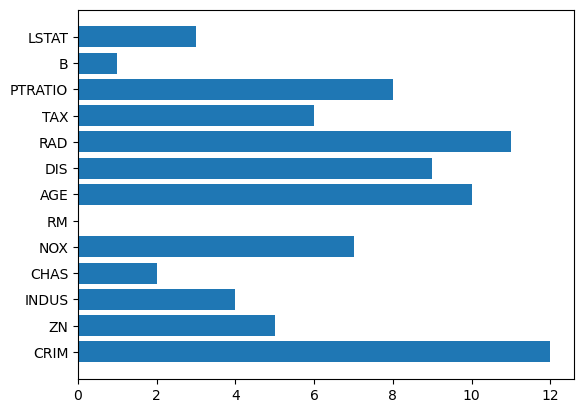

In [197]:
plt.barh(df.columns[0:13],rt.feature_importances_.argsort()[::-1])

In [202]:
X_test[0].reshape(1,-1) ##predicting sample 

array([[4.9320e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01,
        6.8490e+00, 7.0300e+01, 3.1827e+00, 7.0000e+00, 2.2200e+02,
        1.8400e+01, 3.9690e+02, 7.5300e+00]])

In [210]:
rt.predict(X_test[3].reshape(1,-1)) ## --> this is being done by randomforestregressor

array([22.17696898])

In [211]:
y_test[3]

22.0

In [212]:
lr = LinearRegression()

In [294]:
lt = lr.fit(X_train, y_train)

In [295]:
Evaluate(X_transform,y_train,lr) ##--> Linear regression

X does not have valid feature names, but LinearRegression was fitted with feature names


19.72033391011196

In [296]:
explainer = shap.Explainer(lt.predict,X_train)
shap_value = explainer(X_test)

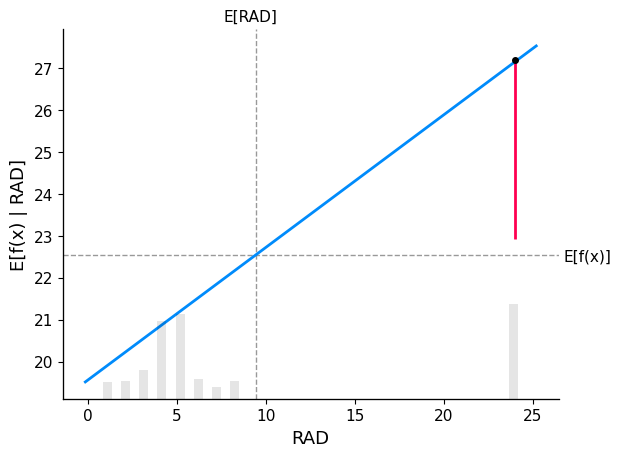

In [301]:
shap.partial_dependence_plot(
    "RAD", lt.predict, X_train, model_expected_value=True,
    feature_expected_value=True, ice=False, shap_values= shap_value[10:11,:]
)

In [225]:
df

array([ 1.66307324e-02,  2.47427463e+00, -1.65352947e-02, -3.34870025e+00,
        2.74190160e+00, -2.04245144e+00, -2.00119631e+00,  7.99624940e-01,
       -3.73233025e+00, -1.16259926e-01,  5.56061815e-02,  2.58498034e+00,
       -1.91474547e+01])

In [236]:
X_train = pd.DataFrame(X_train, columns=columns)

In [238]:
X_test = pd.DataFrame(X_test, columns=columns)

<Axes: ylabel='Density'>

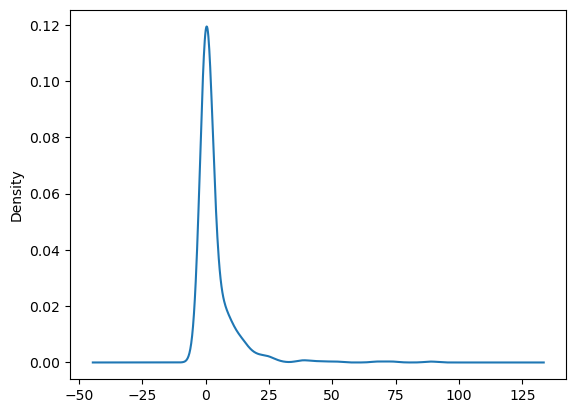

In [245]:
df['CRIM'].plot(kind='kde')

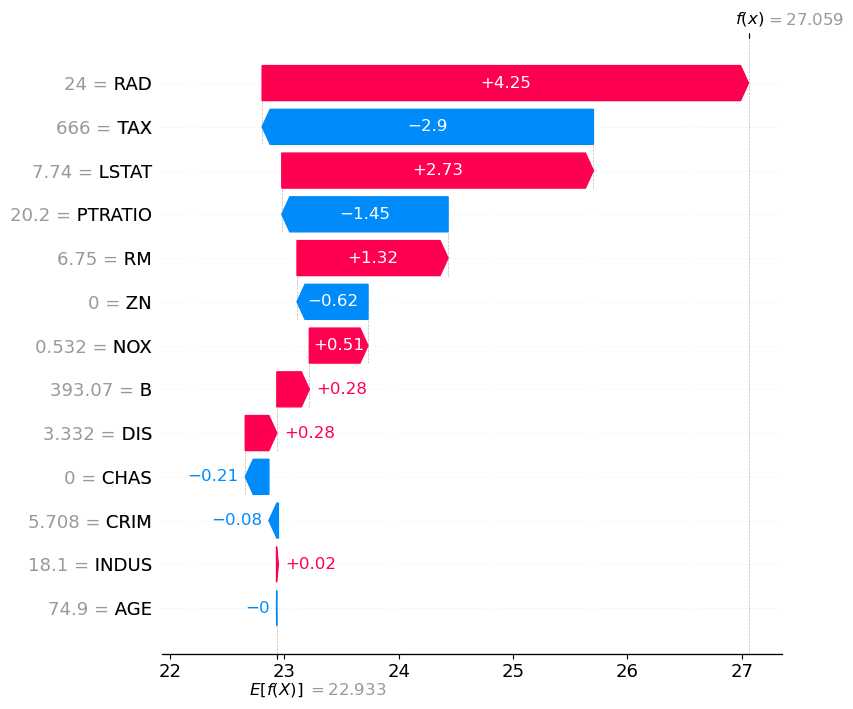

In [297]:
shap.plots.waterfall(shap_value[10],max_display=14)
plt.show()

In [300]:
shap_value[10]

.values =
array([-8.29194274e-02, -6.20564985e-01,  1.63365887e-02, -2.06798427e-01,
        5.12960312e-01,  1.32067536e+00, -1.54196084e-03,  2.76257732e-01,
        4.25325470e+00, -2.89724715e+00, -1.45394128e+00,  2.84031853e-01,
        2.72532713e+00])

.base_values =
22.93311475207574

.data =
array([5.70818e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.32000e-01,
       6.75000e+00, 7.49000e+01, 3.33170e+00, 2.40000e+01, 6.66000e+02,
       2.02000e+01, 3.93070e+02, 7.74000e+00])

In [287]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04932,33.0,2.18,0.0,0.4720,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53
1,0.02543,55.0,3.78,0.0,0.4840,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18
2,0.22927,0.0,6.91,0.0,0.4480,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80
3,0.05789,12.5,6.07,0.0,0.4090,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10
4,3.67822,0.0,18.10,0.0,0.7700,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19
5,0.59005,0.0,21.89,0.0,0.6240,6.372,97.9,2.3274,4.0,437.0,21.2,385.76,11.12
6,0.03615,80.0,4.95,0.0,0.4110,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70
7,1.35472,0.0,8.14,0.0,0.5380,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04
8,0.11069,0.0,13.89,1.0,0.5500,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92
9,0.04684,0.0,3.41,0.0,0.4890,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81


In [299]:
y_test[10]

23.7